# Análisis de variables socioeconómicas de países en el año 2000

El archivo paises.csv contiene datos de tres variables (esperanza de
vida, PBI per capita y emisiones de CO2 por persona), para un conjunto
de países, en el año 2000. Los datos se encuentran normalizados, de
modo que cada variable tiene media cero y la diferencia entre el mínimo
y el máximo de cada variable es 1.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.linalg import block_diag
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
Paises = pd.read_csv("paises.csv") #Datos ya normalizados
datosPaises = Paises.to_numpy()
X = datosPaises
print(Paises)

          x1        x2        x3
0   0.145273  0.037368 -0.025006
1   0.359848  0.604507  0.749228
2  -0.166468 -0.258156 -0.171219
3   0.031912 -0.062716 -0.138407
4  -0.640152 -0.308476 -0.233906
5   0.347702  0.662889  0.760741
6   0.157418  0.054048  0.004927
7   0.250536  0.437701  0.176467
8   0.133127 -0.149177 -0.111928
9  -0.077399 -0.171139 -0.128621
10 -0.134080 -0.218123 -0.174673
11 -0.607764 -0.321264 -0.227862
12  0.064301 -0.065496 -0.115957
13 -0.053108 -0.254820 -0.178702
14 -0.198857 -0.337111 -0.239259
15  0.246487  0.343178  0.103937
16  0.141224  0.006787 -0.049759


In [5]:
cov = np.transpose(X)@X/len(X) #calculo matriz de covarianzas
print(cov)

[[0.07857834 0.06999123 0.05732113]
 [0.06999123 0.09820594 0.08693768]
 [0.05732113 0.08693768 0.08837945]]


In [8]:
e = np.linalg.eig(cov)
print(e[0])
print(e[1])
#Los autovalores ya están ordenados de mayor a menor.

[0.23312334 0.0273206  0.0047198 ]
[[ 0.50463301  0.8333216   0.225656  ]
 [ 0.63716902 -0.18312054 -0.74865379]
 [ 0.58254713 -0.52157643  0.62337538]]


In [7]:
U = e[1]
Z = X@U
print(Z)

[[ 0.08255153  0.12725883 -0.01078224]
 [ 1.00322472 -0.20160854  0.09568556]
 [-0.34823753 -0.00214418  0.04897161]
 [-0.10448523  0.11026777 -0.03212618]
 [-0.65585456 -0.35496478 -0.05932362]
 [ 1.0410015  -0.22842559  0.05641369]
 [ 0.11674653  0.11871313 -0.00186982]
 [ 0.50811886  0.03658369 -0.16114655]
 [-0.09307375  0.19663381  0.07194941]
 [-0.22303103  0.03392647  0.03047904]
 [-0.30839715  0.0193165   0.02415614]
 [-0.64413753 -0.3287853  -0.038673  ]
 [-0.07683409  0.12605769 -0.00874142]
 [-0.29326588  0.09561364  0.06738954]
 [-0.45452621  0.02081221  0.05835785]
 [ 0.40359611  0.08834926 -0.13650871]
 [ 0.04660371  0.14239538 -0.0042313 ]]


In [9]:
var_total = sum(e[0])
proporcion = e[0]/var_total
print(proporcion)

[0.87916749 0.10303296 0.01779955]


La primera componente explica aproximadamente el 87.9% de la varianza total, pero las dos primeras componentes juntas explican aproximadamente el 98.2% de la varianza total. Basta con las dos primeras componentes para explicar al menos un 95% de la varianza total.

In [10]:
proporcion[0]+proporcion[1]

0.9822004452623769

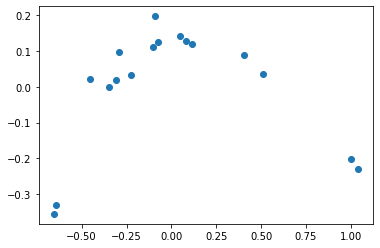

In [11]:
z1 = Z[:,0]
z2 = Z[:,1]
plt.scatter(z1,z2) #Gráfico de dispersión

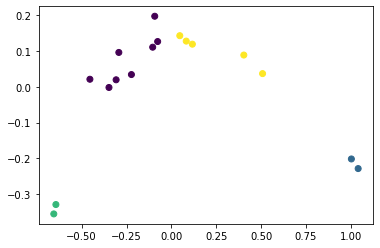

In [12]:
Z_b = np.c_[z1,z2]
# Defino KMeans
kmeans4 = KMeans(n_clusters=4)
# Asigno cada observación a un cluster
clustersKmeans = kmeans4.fit_predict(Z_b)
plt.scatter(z1,z2,c=clustersKmeans)

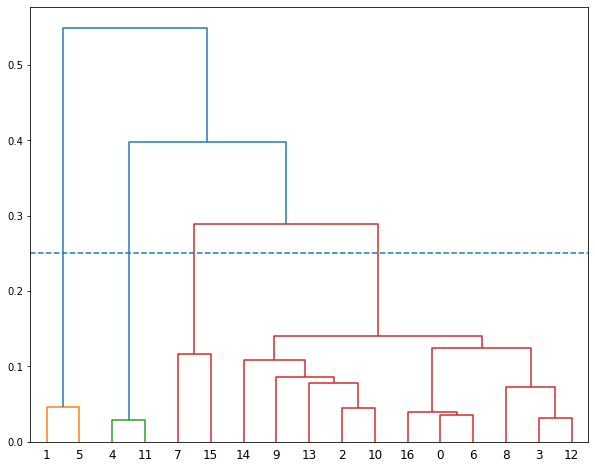

In [13]:
Criterios = linkage(Z_b, method='single', metric='euclidean')
corte = 0.25
plt.figure(figsize=(10,8))
dendrogram(Criterios,orientation='top') 
plt.axhline(linestyle='--', y=corte)   #Línea de corte

La línea de corte corta cuatro veces, por lo que se obtienen 4 clusters distintos.

[4 1 4 4 2 1 4 3 4 4 4 2 4 4 4 3 4]


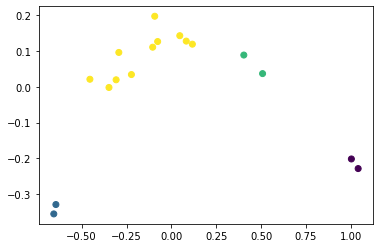

In [14]:
clusters = fcluster(Criterios, corte, criterion = 'distance')
print(clusters) #Clasifico los puntos en 4 clusters

plt.scatter(z1,z2,c=clusters)

Notar que este gráfico se corresponde con el propuesto por el dendrograma, que decía que habrían 3 clusters con 2 puntos cada uno y un cluster más grande con 11 puntos.